## Extreme libere ##

 *proiect realizat de Pencea Amalia - Raluca*

Fie o funcție de două variabile $f:\mathbb{R}^2\to \mathbb{R}=f(x,y)$. Ne propunem sa studiem valorile sale extreme, adica sa ii gasim minimul si maximul, considerand ca functia este definita, derivabila si continua pe tot domeniul de definitie.

Pasii pe care ii urmam sunt:
1) Rezolvam sistemul de ecuatii dat de anularea derivatelor partiale de ordinul intai, din care aflam punctele critice, care este posibil sa fie de extrem. Asadar, rezolvam sistemul: 
$$\left\{\begin{array}\\f_{x}=0 \\f_{y}=0\end{array}\right. \Rightarrow A_{1}(x_{1},y_{1}),A_{2}(x_{2},y_{2})...$$

2) Pentru fiecare dintre punctele critice $A_{i}$ se alcatuieste matricea hessiana a functiei, alcatuita din derivatele de ordinul al doilea si se evalueaza matricea in punctele critice: 
$$H_{f}(A_{i})=\begin{pmatrix}
f_{xx}(A_{i}) & f_{xy}(A_{i})\\
f_{xy}(A_{i}) & f_{yy}(A_{i})
\end{pmatrix}$$

3) Fie $A_{i}$ un punct critic fixat. Calculam valorile proprii $\lambda_{1,2}$ ale matricei hessiene $H_{f}(A_{i})$ si decidem astfel:<br/>
* Daca $\lambda_{1},\lambda_{2} > 0$, atunci punctul $A_{i}$ este de minim local;
* Daca $\lambda_{1},\lambda_{2} < 0$, atunci punctul $A_{i}$ este de maxim local;
* Daca $\lambda_{1}\cdot\lambda_{2} > 0$, atunci punctul $A_{i}$ nu este de extrem;
* Daca $\lambda_{1}\cdot\lambda_{2} = 0$, nu putem decide.<br/>
 
4) Se repeta procedura pentru fiecare dintre punctele critice


Se adauga librariile ce se vor folosi in rezolvarea problemei

In [37]:
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from sympy import symbols
import numpy as np
from matplotlib import cm

Se defineste functia:

In [38]:
x, y = symbols('x y')
f = x**3+3*x*(y**2)-15*x-12*y

 ### $$ f(x,y)=x^3+3xy^2-15x-12y $$ ###

Derivata partiala a functiei f dupa variabila x:

In [39]:
Fx = diff(f,x)
Fx

3*x**2 + 3*y**2 - 15

### $$\frac{\partial f}{\partial x} = 3x^2+3y^2-15$$ ###

Derivata partiala a functiei f dupa variabila y:

In [40]:
Fy = diff(f,y)
Fy

6*x*y - 12

### $$\frac{\partial f}{\partial y}=6xy-12$$ ###

Se egalează cu 0 cele două derivate și se rezolvă sistemul obținut (se afla x in functie de y):

In [41]:
eq1 = Eq(Fx,0)
eq2 = Eq(Fy,0)
sol2 = Symbol('sol2')
sol2 = solve(eq2,x,dict=True)
sol2

[{x: 2/y}]

### $$ x=\frac{2}{y}  $$ ###

Se înlocuiește in Fx:

In [42]:
expr = eq1.subs(x,sol2[0][x])
expr

Eq(3*y**2 - 15 + 12/y**2, 0)

Se rezolvă ecuația și se obțin valorile lui y:

In [43]:
val_y = solve(expr,y)
val_y

[-2, -1, 1, 2]

### $$ y_{1}=-2,\hspace{0.8cm}y_{2}=-1,\hspace{0.8cm}y_{3}=1,\hspace{0.8cm}y_{4}=2 $$ ###

Apoi se obțin valorile lui x:

In [44]:
val_x = [sol2[0][x].subs(y,val_y[0]), sol2[0][x].subs(y,val_y[1]), sol2[0][x].subs(y,val_y[2]), sol2[0][x].subs(y,val_y[3])]
val_x

[-1, -2, 2, 1]

### $$ x_{1}=-1,\hspace{0.8cm}x_{2}=-2,\hspace{0.8cm}x_{3}=2,\hspace{0.8cm}x_{4}=1 $$ ###

Astfel s-au obținut punctele critice:

### $$ A(-1, -2)\\B(-2, -1)\\C(2, 1)\\D(1, 2) $$ ###

Se calculează derivatele de ordin 2 și derivata mixtă pentru matricea hessiană:

In [45]:
Fxx = diff(f,x,x)
Fyy = diff(f,y,y)
Fxy = diff(f,x,y)
display(Fxx,Fyy,Fxy)

6*x

6*x

6*y

### $$ \frac{\partial^{2}f}{\partial x^2}=6x \hspace{1.2cm} \frac{\partial^{2}f}{\partial y^2}=6x \hspace{1.2cm} \frac{\partial^{2}f}{\partial x \partial y}=6y $$ ###

Matricea hessiană:

In [46]:
Hf = Matrix([[Fxx, Fxy], [Fxy, Fyy]])
Hf

Matrix([
[6*x, 6*y],
[6*y, 6*x]])

### $$ H_{f}=\begin{pmatrix} 6x & 6y\\ 6y & 6x\end{pmatrix} $$ ###

## Pentru punctul A:

Înlocuim coordonatele punctului A in matricea hessiană:

In [47]:
Hf_A = Hf.subs(x,val_x[0]).subs(y,val_y[0])
Hf_A

Matrix([
[ -6, -12],
[-12,  -6]])

Se află polinomul caracteristic:

In [48]:
I2 = Matrix([[1,0],[0,1]])
det_Hf_A = det(Hf_A-x*I2)
det_Hf_A

x**2 + 12*x - 108

### $$ P_{1}(x)=x^2+12x-108 $$ ###

Se egalează polinomul cu 0 si se afla valorile proprii:

In [49]:
ec1 = Eq(det_Hf_A,0)
ec1

Eq(x**2 + 12*x - 108, 0)

In [50]:
solutii_A = solve(ec1,x)
solutii_A

[-18, 6]

### $$ \lambda_{1}=-18, \hspace{1cm} \lambda_{2}=6 $$ ###

In [51]:
if solutii_A[0]*solutii_A[1]<0:
    print("Punctul nu este de extrem")
elif solutii_A[0]>0 and solutii_A[1]>0:
    print("Punctul este de minim")
elif solutii_A[0]<0 and solutii_A[1]<0:
    print("Punctul este de maxim")
else: print("Natura punctului nu poate fi determinata.")

Punctul nu este de extrem


Pentru că produsul celor două soluții este mai mic decât 0 rezultă că A nu este punct de extrem.


Pentru restul punctelor se folosește aceeași metodă de rezolvare:

In [52]:
nr = len(val_y)
solutii = []
maxime = []
minime = []
# se calculeaza valorile proprii
for i in range(1, nr):
    M = Hf.subs(x,val_x[i]).subs(y,val_y[i])
    # DET este determinantul matricei hessiene, adica polinomul caracteristic
    DET = det(M-x*I2)
    ec = Eq(DET,0)
    solutii.append(solve(ec,x))
    print(solutii)
    # se verifica ce fel de punct s-a obtinut
    if solutii[i-1][0]*solutii[i-1][1]<0:
        print("Punctul",i+1,"nu este de extrem")
    elif solutii[i-1][0]>0 and solutii[i-1][1]>0:
        print("Punctul",i+1,"este de minim")
        k=0
        minime.append([val_x[i],val_y[i]])
        k+=1
    elif solutii[i-1][0]<0 and solutii[i-1][1]<0:
        print("Punctul",i+1,"este de maxim")
        j=0
        maxime.append([val_x[i],val_y[i]])
        j+=1
    else:
        print("Nu se poate decide natura punctului ",i+1)

[[-18, -6]]
Punctul 2 este de maxim
[[-18, -6], [6, 18]]
Punctul 3 este de minim
[[-18, -6], [6, 18], [-6, 18]]
Punctul 4 nu este de extrem


Dupa calcularea valorilor proprii ramase, obtinem:</br>
* $B(-2,-1)\to$ punct de maxim
* $C(2,1)\to$ punct de minim
* $D(1,2)$ nu este punct de extrem

Valorile de extrem:

In [53]:
nr1 = len(minime)
nr2 = len(maxime)
val = []
for i in range(nr1):
    val.append(f.subs(x,minime[0][0]).subs(y,minime[0][1]))
for i in range(nr2):
    val.append(f.subs(x,maxime[0][0]).subs(y,maxime[0][1]))
print(val)

[-28, 28]


Valorile de extrem, care vor fi folosite la reprezentarea grafica, sunt:</br> $$f(2,1)=-28, \hspace{0.5cm}f(-2,-1)=28$$

## Graficul funcției:

<IPython.core.display.Javascript object>


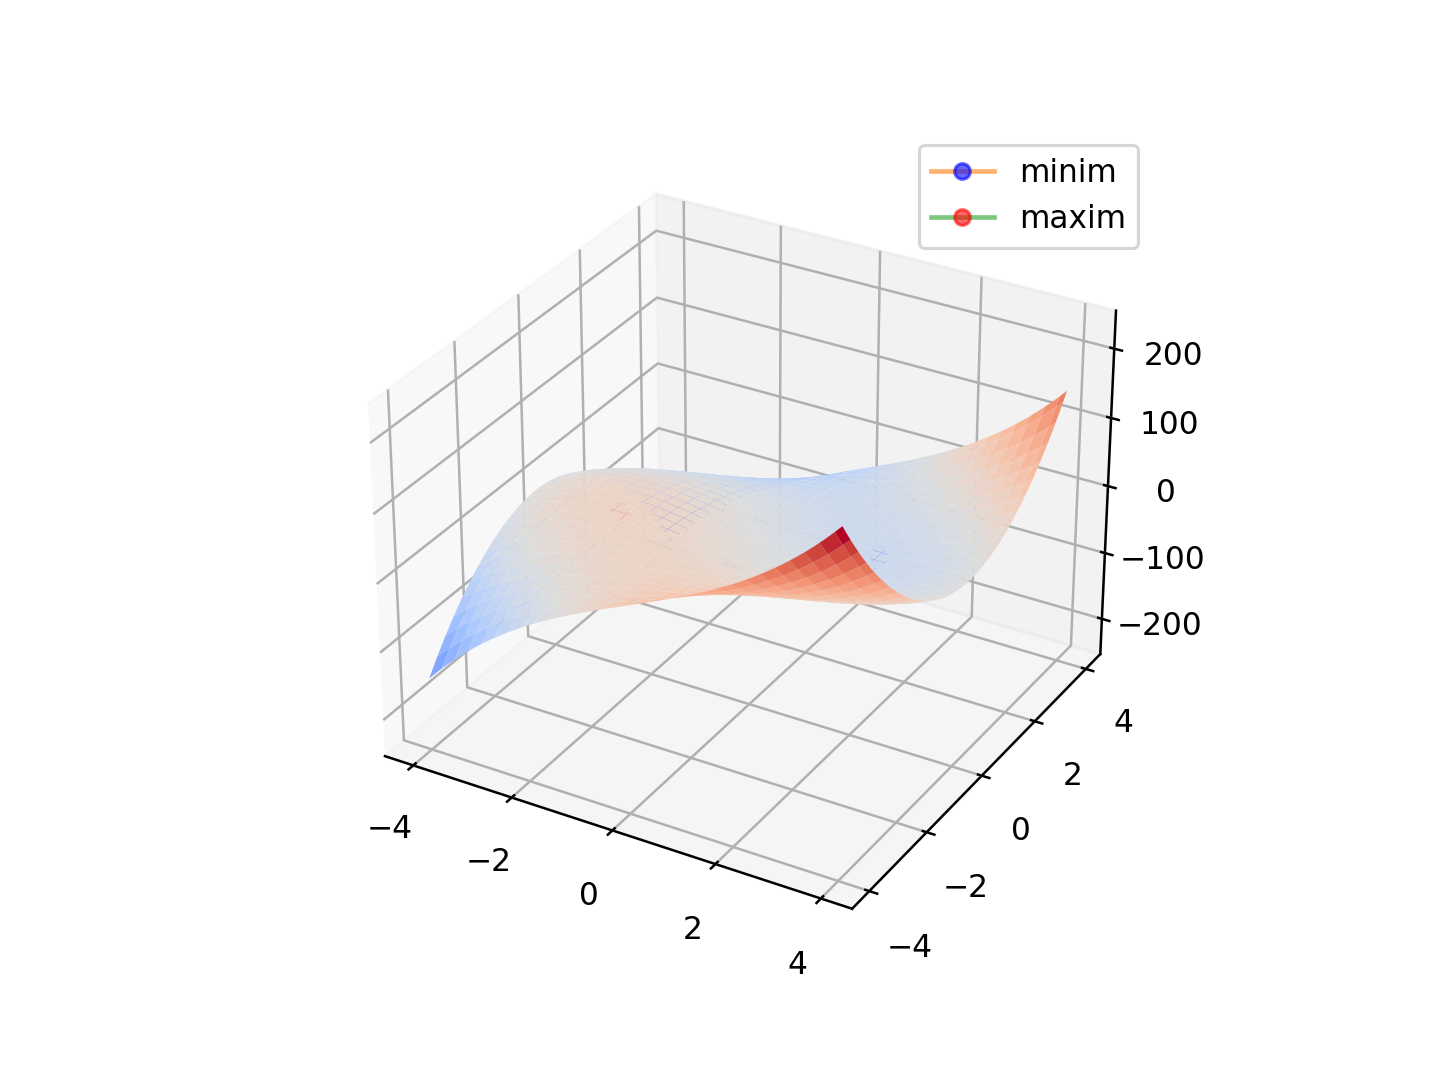

In [54]:
plt.rcParams['legend.fontsize']=10
plt.rcParams['figure.dpi']=150

f = lambda x, y: (x**3+3*x*(y**2)-15*x-12*y)
x = np.linspace(-4,4,60)
y = np.linspace(-4,4,60)
X, Y = np.meshgrid(x,y)
F = f(X,Y)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, F, cmap=cm.coolwarm)

for i in range(nr1):
    ax.plot([minime[i][0]], [minime[i][1]],[val[i]], markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=0.6,label="minim")
for i in range(nr2):
    ax.plot([maxime[i][0]], [maxime[i][1]],[val[i+1]], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=5, alpha=0.6, label="maxim")

ax.legend(loc=0)


### Bibliografie ###

Teorie: https://adrianmanea.xyz/docs/20-21-acs-m1/m1-20-21.pdf        
Tutoriale: https://www.youtube.com/playlist?list=PL5vPHRR9yagZ73XQkP_COMxOLD4J6CiXO     
Alte site-uri:     
https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd    
https://docs.sympy.org/latest/index.html      
https://matplotlib.org/      